In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import sqlite3
import mysql.connector as cnt
import plotly.express as px
import requests

In [2]:
from datetime import datetime

In [ ]:
# Leiskite vartotojui nurodyti iki trijų metreologinių stočių, ir dvi datas : nuo, iki.
# Iš meto.lt per API išgaukite istorinius duomenis nurodytame laikotarpyje,
# ir atvaizduokite grafiškai - oro temperatūrą bei vėjo greitį.

# https://docs.streamlit.io/develop/api-reference/widgets/st.multiselect

# pg = requests.get('https://get.data.gov.lt/datasets/gov/gtc/dirvozemio_temperatura/VietovesTemperaturaDregme')


In [ ]:
uzklausa_miestas = input("iveskite miestu pavadinimus (max 3):")
nuo = input('nuo kada (yyyy-mm-dd)?')
iki = input('nuo kada (yyyy-mm-dd)?')

miestai = uzklausa_miestas.split()

In [ ]:
url1 = 'https://api.meteo.lt/v1/stations'

page = requests.get(url1)
r = page.json()
df = pd.DataFrame(data=r)
codes = df.loc[:,'code'].values

print(codes)

In [3]:
url = 'https://api.meteo.lt/v1/stations'
pg = requests.get(url)
r = pg.json()
stotys = {}
for i in r:
    stotys[i['name']] = i['code']
    # codes[i['code']] = i['name']
# print(stotys)
n = list(stotys.keys())
kodai = list(stotys.values())

# print(n)
# print(kodai)
for i, k in enumerate(n):
    print(f'{i}: {k}')


0: Akmenės AMS
1: Alytaus AMS
2: Anykščių AMS
3: Birštono AMS
4: Biržų AMS
5: Dotnuvos AMS
6: Druskininkų AMS
7: Dūkšto AMS
8: Elektrėnų AMS
9: Jonavos AMS
10: Joniškio AMS
11: Jurbarko AMS
12: Kaišiadorių AMS
13: Kalvarijos AMS
14: Kauno AMS
15: Kazlų Rūdos AMS
16: Kelmės AMS
17: Klaipėdos AMS
18: Kretingos AMS
19: Kupiškio AMS
20: Kybartų AMS
21: Laukuvos AMS
22: Lazdijų AMS
23: Marijampolės AMS
24: Mažeikių AMS
25: Molėtų AMS
26: Nidos AMS
27: Pagėgių AMS
28: Pakruojo AMS
29: Panevėžio AMS
30: Plungės AMS
31: Prienų AMS
32: Raseinių AMS
33: Rietavo AMS
34: Rokiškio AMS
35: Šakių AMS
36: Šalčininkų AMS
37: Šeduvos AMS
38: Šiaulių AMS
39: Šilutės AMS
40: Skuodo AMS
41: Švenčionių AMS
42: Tauragės AMS
43: Telšių AMS
44: Trakų AMS
45: Ukmergės AMS
46: Utenos AMS
47: Varėnos AMS
48: Ventės AMS
49: Vėžaičių AMS
50: Vilniaus AMS
51: Zarasų AMS


In [4]:
stations = input('Įveskite stoties numerį(-ius) (iki trijų numerių, atskirtų kableliais)')
st_idx = list(map(int, stations.split(',')))
print('Jūs pasirinkote šias stotis:')
sel_sts = [n[i] for i in st_idx]
sel_kodai = [kodai[i] for i in st_idx]
print(sel_sts)
print(sel_kodai)

Jūs pasirinkote šias stotis:
['Kauno AMS', 'Klaipėdos AMS', 'Vilniaus AMS']
['kauno-ams', 'klaipedos-ams', 'vilniaus-ams']


In [ ]:
print("pasirinkite laikotarpi (max menuo)")

In [5]:
nuo = input('nuo kada (yyyy-mm-dd)?')
iki = input('nuo kada (yyyy-mm-dd)?')


In [ ]:
# start date
start_date = datetime.strptime(nuo, "%Y-%m-%d")
end_date = datetime.strptime(iki, "%Y-%m-%d")

# difference between each date. D means one day
D = 'D'

date_list = pd.date_range(start_date, end_date, freq=D)
print(f"Creating list of dates starting from {start_date} to {end_date}")
# print(date_list)

# if you want dates in string format then convert it into string
print(date_list.strftime("%Y-%m-%d"))



In [6]:
from datetime import date, timedelta
from dateutil import parser
# nuo = input('Įveskite datą YYYY-MM-DD formatu')
# iki = input('Įveskite datą YYYY-MM-DD formatu')

datos = []
laikai = []

start_date = parser.parse(nuo)
end_date = parser.parse(iki)
delta = timedelta(days=1)
while start_date <= end_date:
    print(start_date.strftime("%Y-%m-%d"))
    datos.append(str(start_date))
    start_date = start_date + delta
    
    
for i in datos:
    laikai.append(i[:10])
    
print(laikai)

2024-09-01
2024-09-02
2024-09-03
2024-09-04
2024-09-05
2024-09-06
2024-09-07
2024-09-08
2024-09-09
['2024-09-01', '2024-09-02', '2024-09-03', '2024-09-04', '2024-09-05', '2024-09-06', '2024-09-07', '2024-09-08', '2024-09-09']


[11.3, 12.1, 11.3, 9.8, 9.1, 11.7, 14.3, 16, 17.8, 18.9, 19.8, 19.7, 20.7, 20.5, 21.2, 20.8, 20.6, 19.3, 16.5, 14.4, 12.5, 11.6, 12.4, 12.4, 12, 11.3, 10.6, 10.2, 10, 11.6, 15.7, 18.6, 18.9, 19.6, 20.4, 19.4, 19.3, 20, 19, 19.8, 19.1, 17, 13.5, 13.8, 13.5, 13.5, 13.2, 13, 12.7, 11.9, 11.4, 11, 10.7, 11.9, 13.7, 16, 18, 19.1, 19.8, 21, 21.1, 21.7, 22.2, 22, 20.8, 19.1, 17.1, 16.1, 14.8, 15.4, 15.8, 15.4, 11.3, 11.1, 10.4, 9.6, 9.9, 11.8, 13.9, 16.7, 18.8, 19.8, 21.3, 22.8, 23.6, 23.6, 24.2, 23.7, 23.4, 22, 20.3, 19.5, 18.8, 17.2, 16.6, 16.1, 12, 11.4, 10.4, 10.2, 11, 12.4, 16.2, 19.1, 20.2, 20.3, 19.8, 20.1, 20.1, 20.2, 19.9, 19.6, 19.7, 17.7, 15.2, 15.2, 15.3, 14.7, 14.2, 14, 15.2, 14.5, 14, 13.6, 13.4, 13.8, 15.9, 18.1, 20.9, 23, 24.1, 25.7, 26.5, 27, 26.7, 26.9, 26.2, 23.6, 21.8, 20.9, 19.9, 19.2, 18.8, 18.2, 15.9, 15, 15.4, 15.4, 15.9, 16.8, 18.7, 21.6, 23.3, 25.7, 27.4, 28.2, 28.8, 29.3, 29.2, 28.7, 27.7, 24.9, 21.9, 21.3, 19.9, 17.7, 16.6, 17, 14.2, 13.6, 13.3, 13.2, 12.5, 13.9, 1

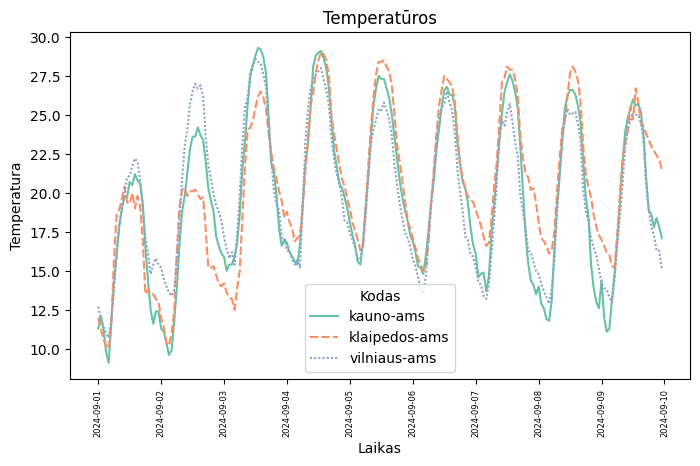

In [7]:
stotys = []
data = []
temperatura = []
vejas = []


for d in laikai:
    for s in sel_kodai:
        url2 = f'https://api.meteo.lt/v1/stations/{s}/observations/{d}'
        observations = requests.get(url2).json()['observations']
        for o in observations:
            stotys.append(s)
            data.append(o['observationTimeUtc'])
            temperatura.append(o['airTemperature'])
            vejas.append(o['windSpeed'])

print(temperatura)
print(vejas)

ndf = pd.DataFrame(data)
ndf['Kodas'] = pd.DataFrame(data=stotys)
ndf['Temperatūros'] = pd.DataFrame(data=temperatura)
ndf['Data'] = pd.DataFrame(data=data)
ndf['vejasSpeed'] = pd.DataFrame(data=vejas)

ndf['Datos'] = pd.to_datetime(ndf['Data'])
ndf['Laikai'] = pd.to_datetime(ndf['Data']).dt.time

fig, axes = plt.subplots(figsize=(8, 4.5))

axes.set_title('Temperatūros')
ax = sns.lineplot(data=ndf,x = 'Datos', y='Temperatūros', ax=axes, hue='Kodas', palette='Set2', style='Kodas')
axes.set(xlabel='Laikas',ylabel='Temperatura')
# axes.set_xticks(data)
axes.tick_params(axis='x', rotation=90, labelsize=6)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

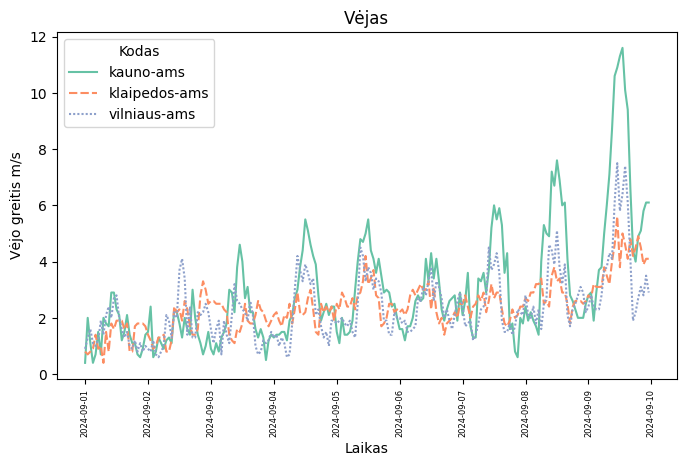

In [8]:
fig, axes = plt.subplots(figsize=(8, 4.5))

axes.set_title('Vėjas')
ax = sns.lineplot(data=ndf,x = 'Datos', y='vejasSpeed', ax=axes, hue='Kodas', palette='Set2', style='Kodas')
axes.set(xlabel='Laikas',ylabel='Vėjo greitis m/s')
# axes.set_xticks(data)
axes.tick_params(axis='x', rotation=90, labelsize=6)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

In [ ]:
# https://data.gov.lt/datasets/2638/models/VietovesTemperaturaDregme/
# nuskaitykite šiuos duomenis (atsisiuntę kaip CSV ar kitu jums priimtinu būdu)
# atvaizduokite su scatter_mapbox, kuriose Lietuvos vietose yra įrengti registratoriai.
# atvaizduokite vieno bet kurio vietos registratoriaus užfiksuotas temperatūras (istorinius duomenis)
# 8 cm gylyje, paviršiuje, 15 cm aukštyje.

# zorder
# .plot(x, y, zorder=5)

In [ ]:
vdtd = pd.read_csv('../../../eismas/VietovesTemperaturaDregme.csv')[[
    'atvejo_id',
    'vietoves_registratoriaus_id',
    'laikas',
    'temperatura_8cm_gylyje_dirvozemyje',
    'temperatura_dirvozemio_pavirsiuje',
    'temperatura_15cm_virs_dirvozemio',
    'platuma',
    'ilguma'
]]
vdtd.head()

In [ ]:
vdtd.info()

In [ ]:
vdtd_gr = vdtd.groupby(['ilguma', 'platuma']).size().rename('count').reset_index()
vdtd_gr.head()
print(len(vdtd_gr))

In [ ]:
fig = px.scatter_mapbox(data_frame=vdtd, lon='ilguma', lat='platuma', zoom=5, title='registratoriai')
fig.update_layout(mapbox_style='open-street-map')
fig.update_layout(width=800, height=600)
fig.show()

In [17]:
vdtd['laikas'] = pd.to_datetime(vdtd['laikas'])

In [ ]:
fig = px.scatter_mapbox(data_frame=vdtd, lon='ilguma', lat='platuma', zoom=5, title='registratoriai')
fig.update_layout(mapbox_style='open-street-map')
fig.update_layout(width=800, height=600)
fig.show()

In [ ]:
regs_id = list(set(list(vdtd['vietoves_registratoriaus_id'])))
print(regs_id)

In [ ]:
reg1 = regs_id[0]
reg1df = vdtd[vdtd['vietoves_registratoriaus_id']==reg1]
print(reg1)

In [9]:
reg7 = regs_id[6]
reg7df = vdtd[vdtd['vietoves_registratoriaus_id']==reg7]

In [ ]:
fig, axes = plt.subplots(figsize=(8,4.5))

axes.set_title(f'Temperatūros registratoriaus {reg1}')
sns.scatterplot(data=reg1df,x = 'laikas', y='temperatura_8cm_gylyje_dirvozemyje', ax=axes,label='-8cm', zorder=5)
sns.scatterplot(data=reg1df,x = 'laikas', y='temperatura_15cm_virs_dirvozemio', ax=axes,label='15cm')
sns.scatterplot(data=reg1df,x = 'laikas', y='temperatura_dirvozemio_pavirsiuje', ax=axes,label='0cm')
axes.set(xlabel='Data ir laikas',ylabel='Temperatūra')
axes.legend()
plt.show()

In [ ]:
fig, axes = plt.subplots(figsize=(8,4.5))

axes.set_title(f'Temperatūros registratoriaus {reg7}')
sns.lineplot(data=reg7df,x = 'laikas', y='temperatura_8cm_gylyje_dirvozemyje', ax=axes,label='-8cm', zorder=5)
sns.lineplot(data=reg7df,x = 'laikas', y='temperatura_15cm_virs_dirvozemio', ax=axes,label='15cm')
sns.lineplot(data=reg7df,x = 'laikas', y='temperatura_dirvozemio_pavirsiuje', ax=axes,label='0cm')
axes.set(xlabel='Data ir laikas',ylabel='Temperatūra')
axes.legend()
plt.show()